core           INFO 	Loading data for Miami Grand Prix - Race [v3.3.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '11', '55', '44', '22', '63', '14', '31', '27', '10', '81', '24', '3', '77', '18', '23', '20', '2']


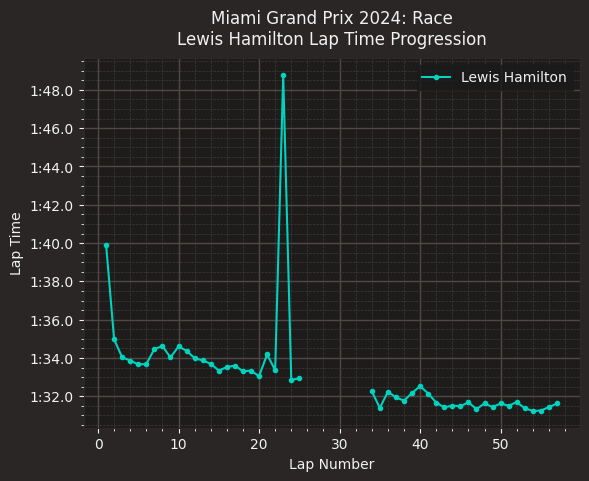

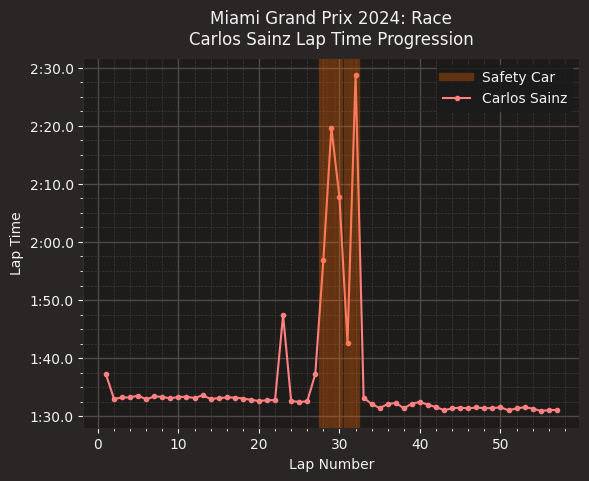

In [28]:
import gripf1

session = gripf1.core.create_session("Miami")
ham = gripf1.core.Driver("ham", session)
sai = gripf1.core.Driver("sai", session)

Ham_LTC = gripf1.analysis.lap_time_chart.LapTimeChart(session, ham, [26, 27, 28, 29, 30, 31, 32, 33], legend=True)
Ham_LTC.plot()

Nor_LTC = gripf1.analysis.lap_time_chart.LapTimeChart(session, sai, legend=True, mark_sc=True)
Nor_LTC.plot()

core           INFO 	Loading data for Miami Grand Prix - Race [v3.3.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '11', '55', '44', '22', '63', '14', '31', '27', '10', '81', '24', '3', '77', '18', '23', '20', '2']


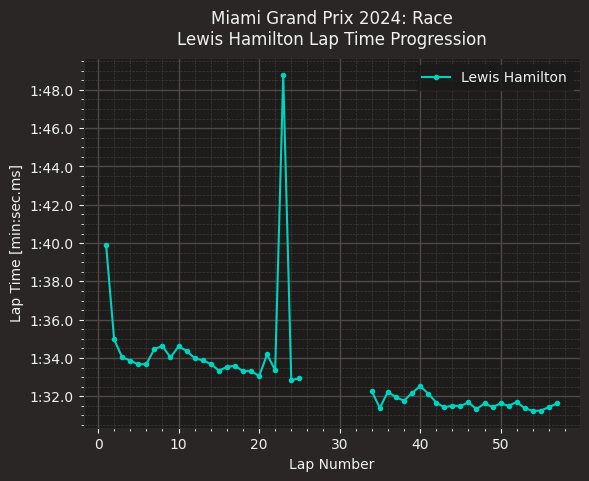

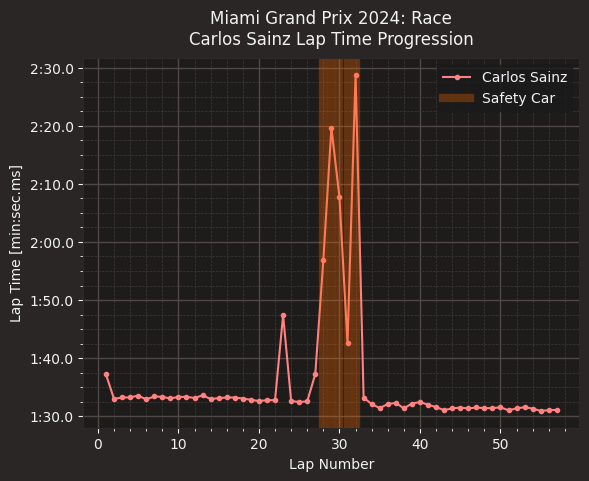

In [39]:
import fastf1.plotting
import pandas
import numpy as np
from matplotlib import pyplot as plt

fastf1.Cache.enable_cache('cache')
fastf1.plotting.setup_mpl()

session = fastf1.get_session(2024, 'Miami', 'Race')
session.load()

driver = 'HAM'
driver_name = fastf1.plotting.DRIVER_TRANSLATE.get(driver).title()
driver_color = fastf1.plotting.driver_color(driver)
driver_laps = session.laps.pick_driver(driver)

excluded_laps = [26, 27, 28, 29, 30, 31, 32, 33]

fig, ax = plt.subplots()
title = f'{session.event.EventName} {session.event.year}: {session.name}\n{driver_name} Lap Time Progression'
ax.set_title(title, fontsize=12, pad=10)
ax.set(xlabel='Lap Number', ylabel='Lap Time [min:sec.ms]')
ax.grid(True)

data_dict = {"x_data": driver_laps['LapNumber'], "y_data": driver_laps['LapTime']}
data_df = pandas.DataFrame(data_dict)
data_df.loc[data_df['x_data'].isin(excluded_laps), 'y_data'] = np.nan

ax.plot(data_df['x_data'], data_df['y_data'], label=driver_name, color=driver_color, marker='.', zorder=1)
ax.legend()
plt.show()


driver2 = 'SAI'
driver_name2 = fastf1.plotting.DRIVER_TRANSLATE.get(driver2).title()
driver_color2 = fastf1.plotting.driver_color(driver2)
driver_laps2 = session.laps.pick_driver(driver2)

fig2, ax2 = plt.subplots()
title2 = f'{session.event.EventName} {session.event.year}: {session.name}\n{driver_name2} Lap Time Progression'
ax2.set_title(title2, fontsize=12, pad=10)
ax2.set(xlabel='Lap Number', ylabel='Lap Time [min:sec.ms]')
ax2.grid(True)

ax2.plot(driver_laps2['LapNumber'], driver_laps2['LapTime'], label=driver_name2, color=driver_color2, marker='.', zorder=1)

sc_label_added = False
for index, lap in driver_laps2.iterrows():
    if '4' in str(lap['TrackStatus']):
        if not sc_label_added:
            ax2.axvline(x=lap['LapNumber'], color="#FF6A00", alpha=0.3, linewidth=6, label="Safety Car", zorder=2)
            sc_label_added = True
        else:
            ax2.axvline(x=lap['LapNumber'], color="#FF6A00", alpha=0.3, linewidth=6, zorder=2)

ax2.legend()
plt.show()

core           INFO 	Loading data for Miami Grand Prix - Race [v3.3.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '11', '55', '44', '22', '63', '14', '31', '27', '10', '81', '24', '3', '77', '18', '23', '20', '2']


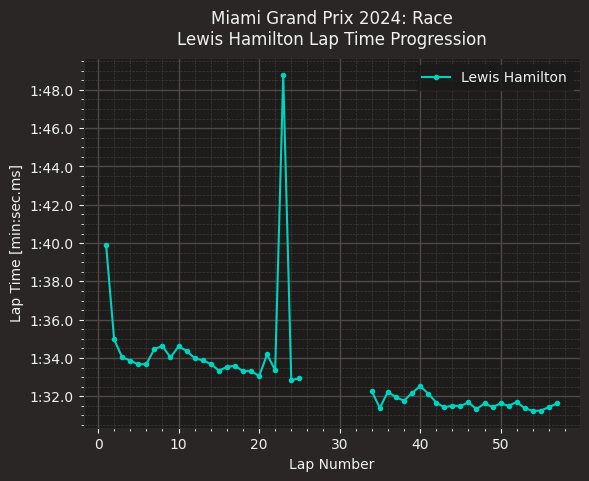

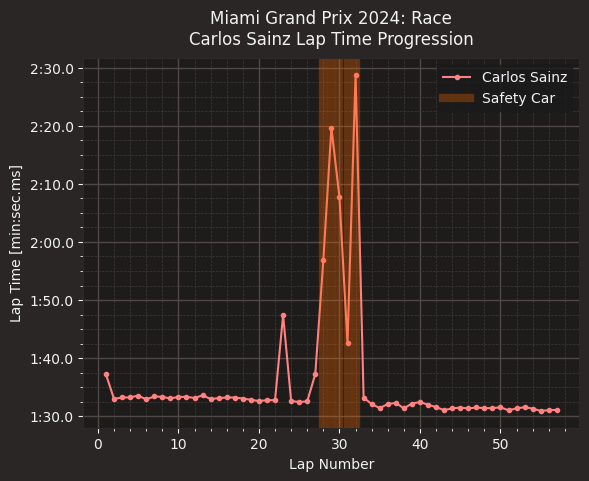

In [3]:
import fastf1.plotting
import pandas
import numpy as np
from matplotlib import pyplot as plt

fastf1.Cache.enable_cache('cache')
fastf1.plotting.setup_mpl()

session = fastf1.get_session(2024, 'Miami', 'Race')
session.load()

def create_plot(session, driver, excluded_laps=None, mark_sc=False):
    driver_name = fastf1.plotting.DRIVER_TRANSLATE.get(driver).title()
    driver_color = fastf1.plotting.driver_color(driver)
    driver_laps = session.laps.pick_driver(driver)
    
    fig, ax = plt.subplots()
    title = f'{session.event.EventName} {session.event.year}: {session.name}\n{driver_name} Lap Time Progression'
    ax.set_title(title, fontsize=12, pad=10)
    ax.set(xlabel='Lap Number', ylabel='Lap Time [min:sec.ms]')
    ax.grid(True)
    
    if excluded_laps is None:
        excluded_laps = []
    
    data_dict = {"x_data": driver_laps['LapNumber'], "y_data": driver_laps['LapTime']}
    data_df = pandas.DataFrame(data_dict)
    data_df.loc[data_df['x_data'].isin(excluded_laps), 'y_data'] = np.nan
    
    ax.plot(data_df['x_data'], data_df['y_data'], label=driver_name, color=driver_color, marker='.', zorder=1)
    
    if mark_sc:
        sc_label_added = False
        for index, lap in driver_laps.iterrows():
            if '4' in str(lap['TrackStatus']):
                if not sc_label_added:
                    ax.axvline(x=lap['LapNumber'], color="#FF6A00", alpha=0.3, linewidth=6, label="Safety Car", zorder=2)
                    sc_label_added = True
                else:
                    ax.axvline(x=lap['LapNumber'], color="#FF6A00", alpha=0.3, linewidth=6, zorder=2)
                    
    ax.legend()
    plt.show()
    
create_plot(session, 'HAM', [26, 27, 28, 29, 30, 31, 32, 33])
create_plot(session, 'SAI', mark_sc=True)